In [1]:
import pickle
import pandas as pd
import matplotlib.pyplot as plt
from src.utils import rank_logs
from src.stats import friedman_statistics, iman_davenport, eval_significance, critical_difference_nemenyi, critical_difference_bonferroni_dunn
from src.plot import draw_nemenyi_diagram, draw_bonferroni_dunn_diagram

In [2]:
with open("logs/gradual.pkl", "rb") as file:
    logs = pickle.load(file)

In [3]:
models = {log.model: 0 for log in logs}
synth_datasets = {log.dataset: 0 for log in logs}
N_MODELS = len(models)
N_DATASETS = len(synth_datasets)
print(f"""
MODELS: {N_MODELS}
N_DATASETS: {N_DATASETS}
""")


MODELS: 6
N_DATASETS: 33



In [4]:
params = ["performance", "memory", "time"]
results = []
for param in params:
    friedman_matrix = rank_logs(logs, param, models.keys(), synth_datasets.keys())
    results.append(friedman_matrix.rank(axis=1, ascending=True, method="average").mean())

results = pd.DataFrame(results, index=params)
stats_results = results.copy()
stats_results["fried_stats"] = results.apply(lambda x: friedman_statistics(x, N_DATASETS), axis=1)
stats_results["iman_davenport"] = stats_results["fried_stats"].apply(lambda x: iman_davenport(x, N_DATASETS, N_MODELS))
stats_results["significant"] = stats_results["iman_davenport"].apply(lambda x: eval_significance(x, N_MODELS, N_DATASETS, 0.05))

In [5]:
rank_logs(logs, "time", models.keys(), synth_datasets.keys())/1e6

HATR (baseline)  \
\n        RandomRBF\n        Seed Model = 168\n...         8.588251   
\n        RandomRBF\n        Seed Model = 575\n...        18.001557   
\n        RandomRBF\n        Seed Model = 386\n...         2.120984   
\n        RandomRBF\n        Seed Model = 370\n...         0.490728   
\n        RandomRBF\n        Seed Model = 489\n...        13.982808   
\n        RandomRBF\n        Seed Model = 21\n ...         8.746141   
\n        RandomRBF\n        Seed Model = 862\n...         5.631386   
\n        RandomRBF\n        Seed Model = 65\n ...        10.783295   
\n        RandomRBF\n        Seed Model = 324\n...        37.387685   
\n        RandomRBF\n        Seed Model = 816\n...         2.590031   
\n        Friedman\n        Drift = GSG\n      ...         0.270969   
\n        Friedman\n        Drift = GSG\n      ...         0.093400   
\n        Friedman\n        Drift = GSG\n      ...         0.084472   
\n        Friedman\n        Drift = GSG\n      ...         0.084478   
\n        Friedman\n        Drift = GSG\n      ...         0.376986   
\n        Friedman\n        Drift = GSG\n      ...         0.210153   
\n        Friedman\n        Drift = GSG\n      ...         0.463390   
\n        Friedman\n        Drift = GSG\n      ...         0.098349   
\n        Friedman\n        Drift = GSG\n      ...         0.157771   
\n        Friedman\n        Drift = GSG\n      ...         0.296841   
\n        Hyperplane\n        Seed = 159\n     ...        16.421588   
\n        Hyperplane\n        Seed = 176\n     ...        15.641057   
\n        Hyperplane\n        Seed = 139\n     ...         0.308317   
\n        Hyperplane\n        Seed = 779\n     ...         1.190884   
\n        Hyperplane\n        Seed = 114\n     ...         5.639539   
\n        Hyperplane\n        Seed = 631\n     ...         0.764163   
\n        Hyperplane\n        Seed = 652\n     ...         1.742048   
\n        Hyperplane\n        Seed = 692\n     ...         1.162015   
\n        Hyperplane\n        Seed = 817\n     ...         3.217057   
\n        Hyperplane\n        Seed = 368\n     ...         1.396949   
bikes                                                      0.000242   
elec2                                                      0.000301   
covertype                                                  0.000209   

                                                    HTR-QO-0.25 (baseline)  \
\n        RandomRBF\n        Seed Model = 168\n...               62.493695   
\n        RandomRBF\n        Seed Model = 575\n...               50.424156   
\n        RandomRBF\n        Seed Model = 386\n...               61.181623   
\n        RandomRBF\n        Seed Model = 370\n...               50.588315   
\n        RandomRBF\n        Seed Model = 489\n...               50.470473   
\n        RandomRBF\n        Seed Model = 21\n ...               50.893467   
\n        RandomRBF\n        Seed Model = 862\n...               50.921018   
\n        RandomRBF\n        Seed Model = 65\n ...               49.718858   
\n        RandomRBF\n        Seed Model = 324\n...               49.762000   
\n        RandomRBF\n        Seed Model = 816\n...               47.477581   
\n        Friedman\n        Drift = GSG\n      ...               23.330091   
\n        Friedman\n        Drift = GSG\n      ...               23.868843   
\n        Friedman\n        Drift = GSG\n      ...               67.633639   
\n        Friedman\n        Drift = GSG\n      ...               24.415607   
\n        Friedman\n        Drift = GSG\n      ...               51.625405   
\n        Friedman\n        Drift = GSG\n      ...               23.044741   
\n        Friedman\n        Drift = GSG\n      ...               39.009873   
\n        Friedman\n        Drift = GSG\n      ...               42.539829   
\n        Friedman\n        Drift = GSG\n      ...               54.480538   
\n        Friedman\n        Drift = GSG\n      ...               24.295758   

In [6]:
stats_results

HATR (baseline)  HTR-QO-0.25 (baseline)  HTR-QO-0.5 (baseline)  \
performance         5.030303                3.848485               3.030303   
memory              2.242424                5.939394               4.424242   
time                2.333333                5.484848               4.515152   

             HTR-AQO-Triangular  HTR-AQO-Epanechnikov  HTR-AQO-Smooth  \
performance            3.696970              2.878788        2.515152   
memory                 2.242424              2.818182        3.333333   
time                   2.242424              3.030303        3.393939   

             fried_stats  iman_davenport  significant  
performance    38.454545        9.724138         True  
memory         98.627706       47.551265         True  
time           76.792208       27.858657         True

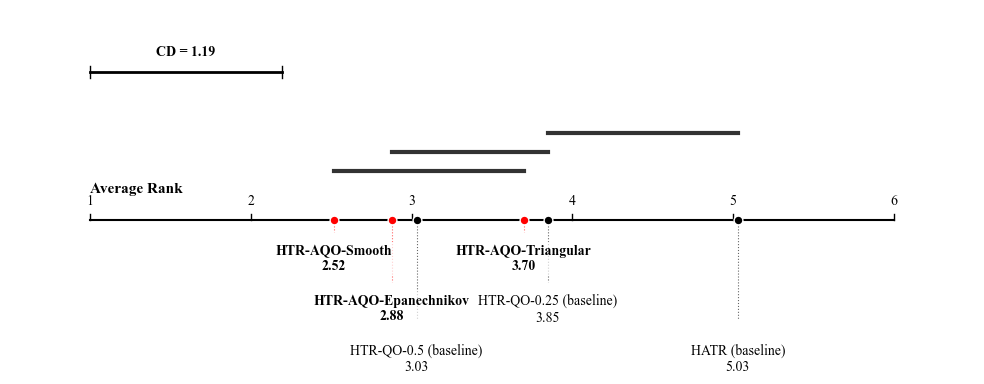

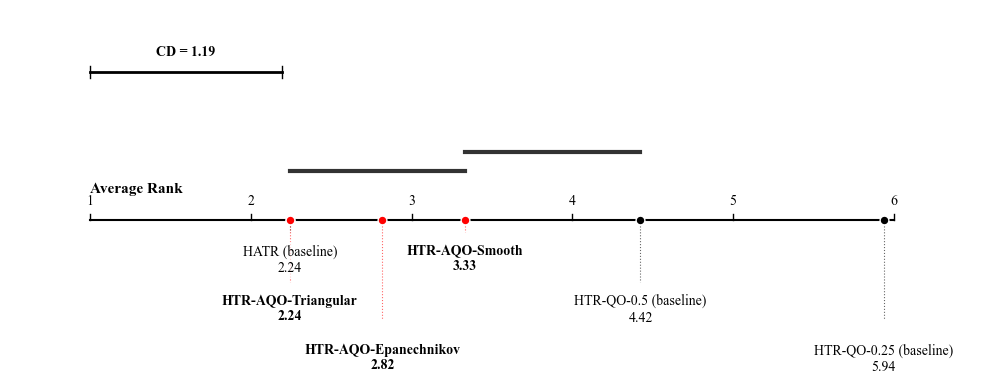

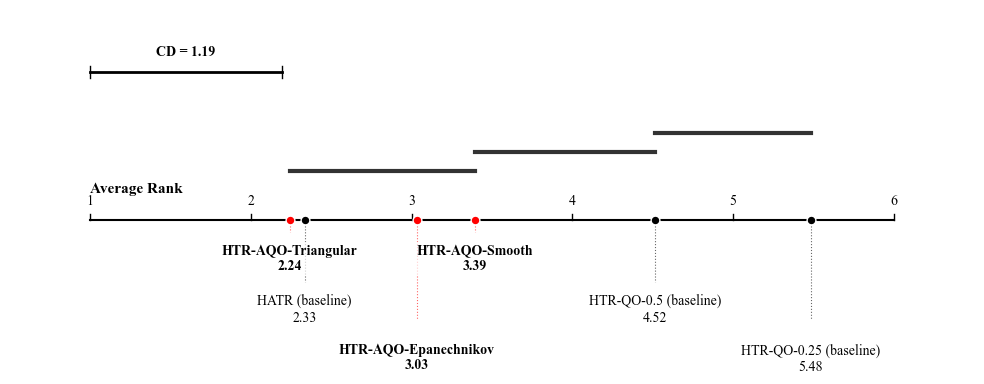

In [7]:
cd = critical_difference_nemenyi(N_MODELS, N_DATASETS, significance=0.1)
for param in params:
    fig = draw_nemenyi_diagram(results.loc[param], cd)
    plt.savefig(f"./output/{param.upper()}.png", dpi=300, bbox_inches="tight")
    plt.show()

In [8]:
from src.plot import Plots

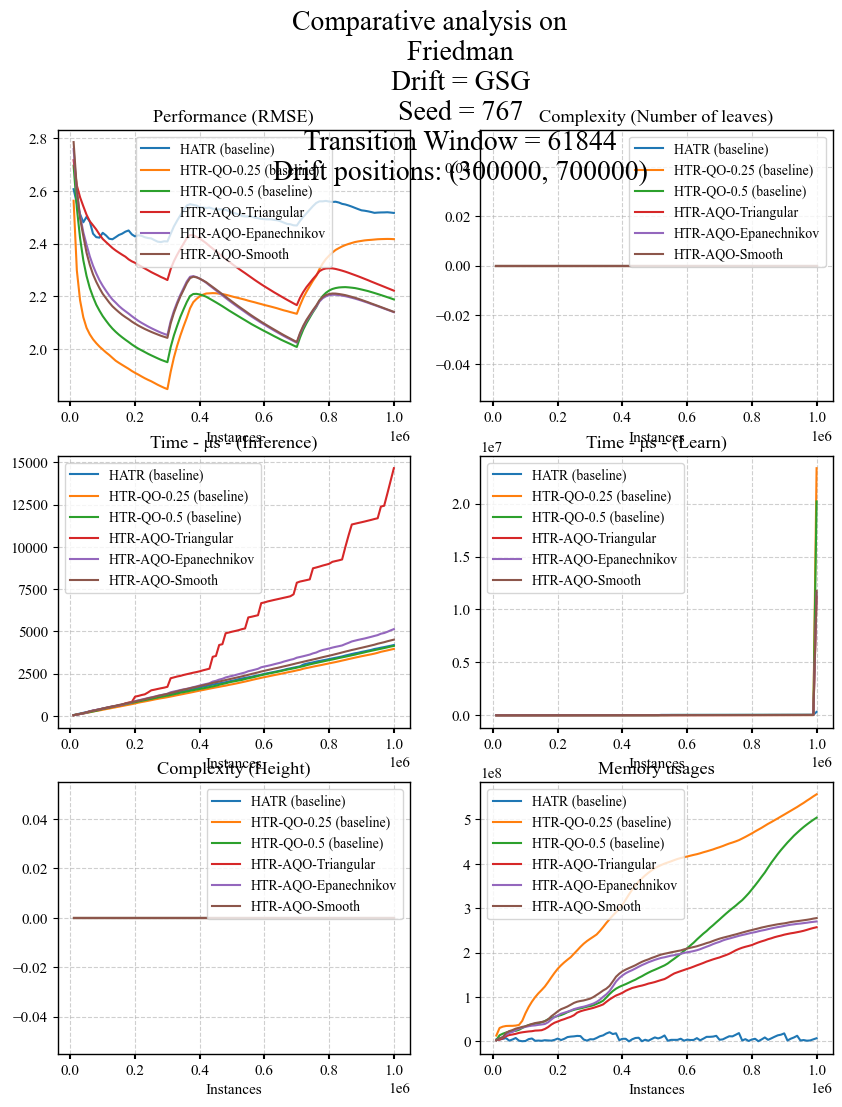

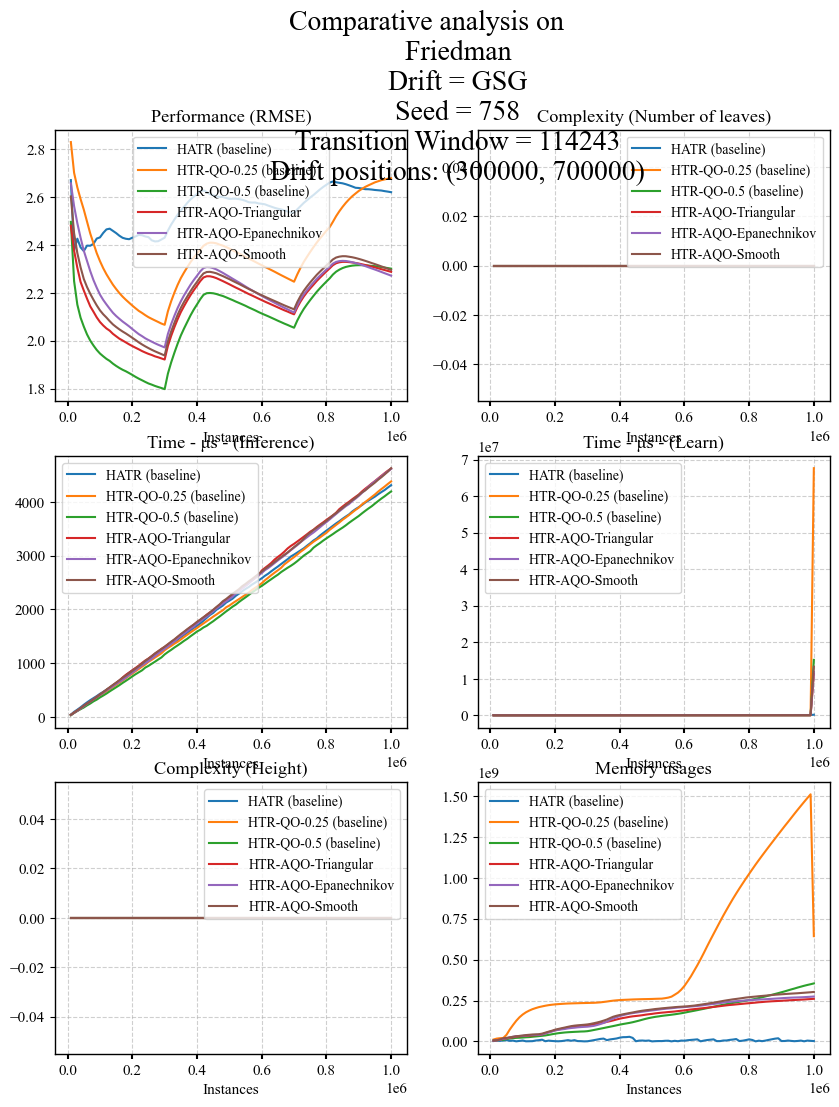

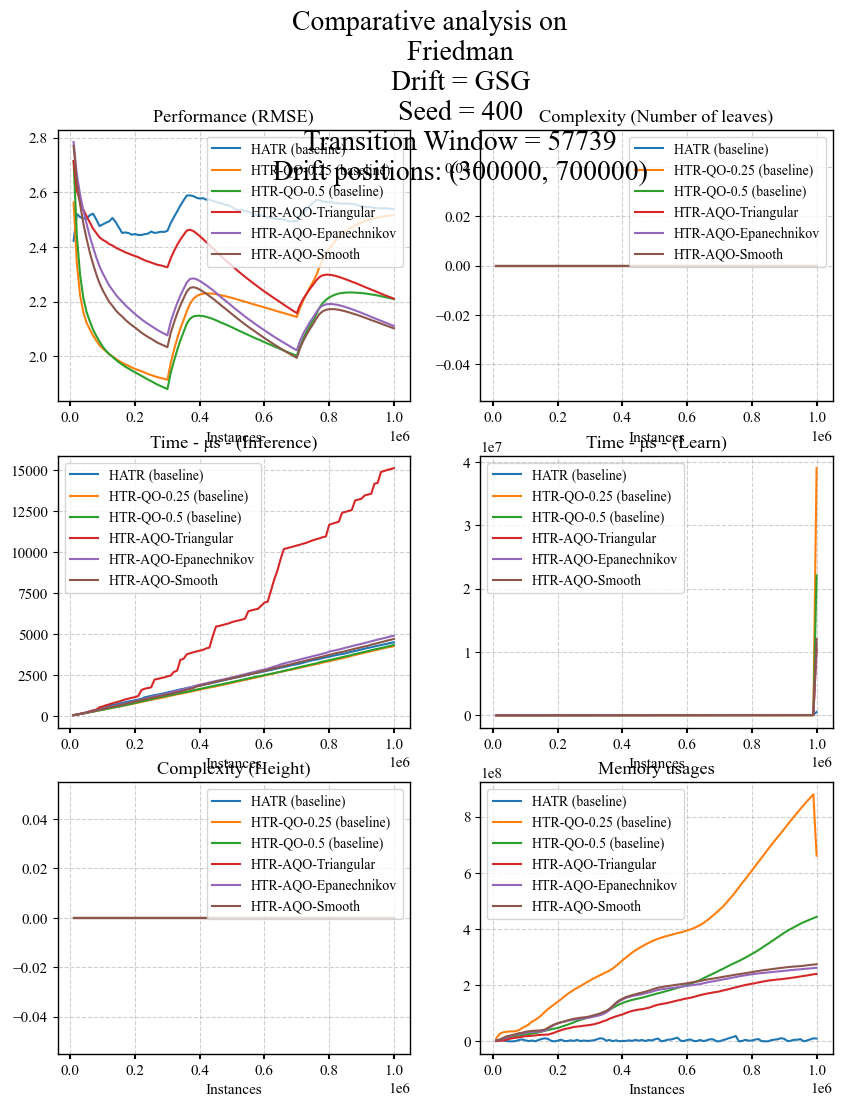

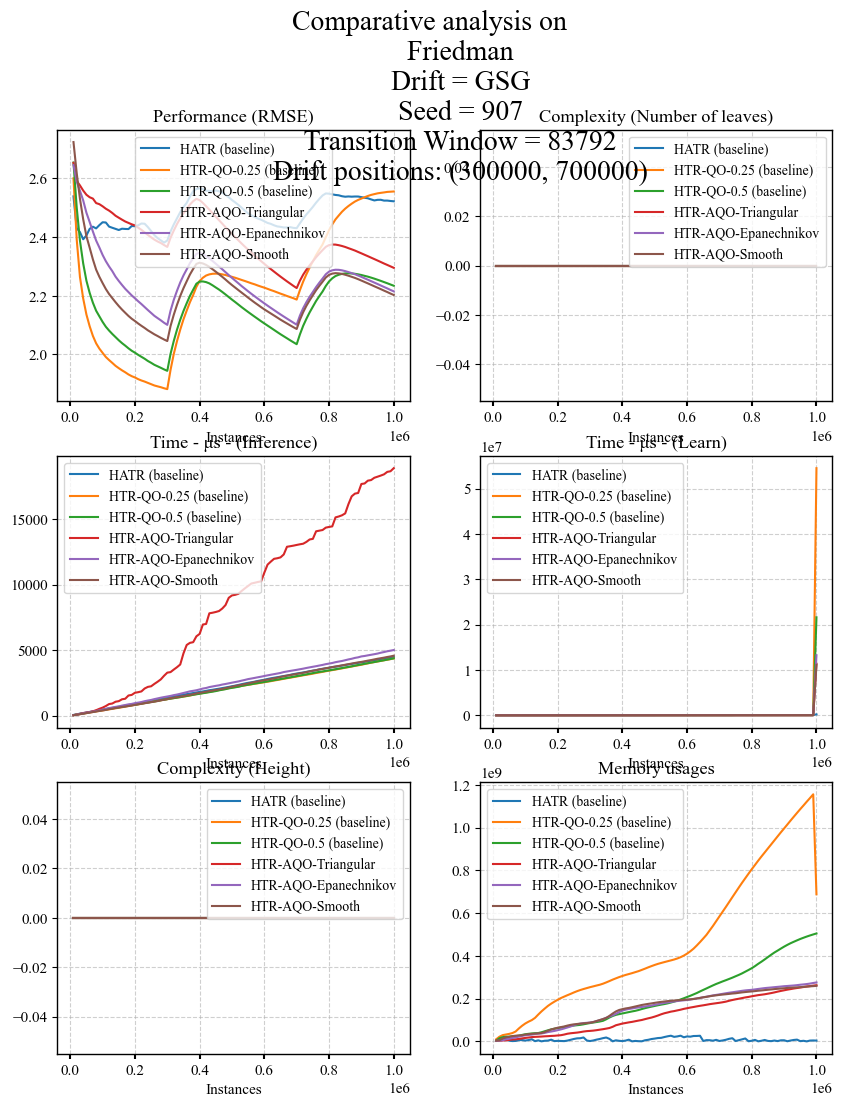

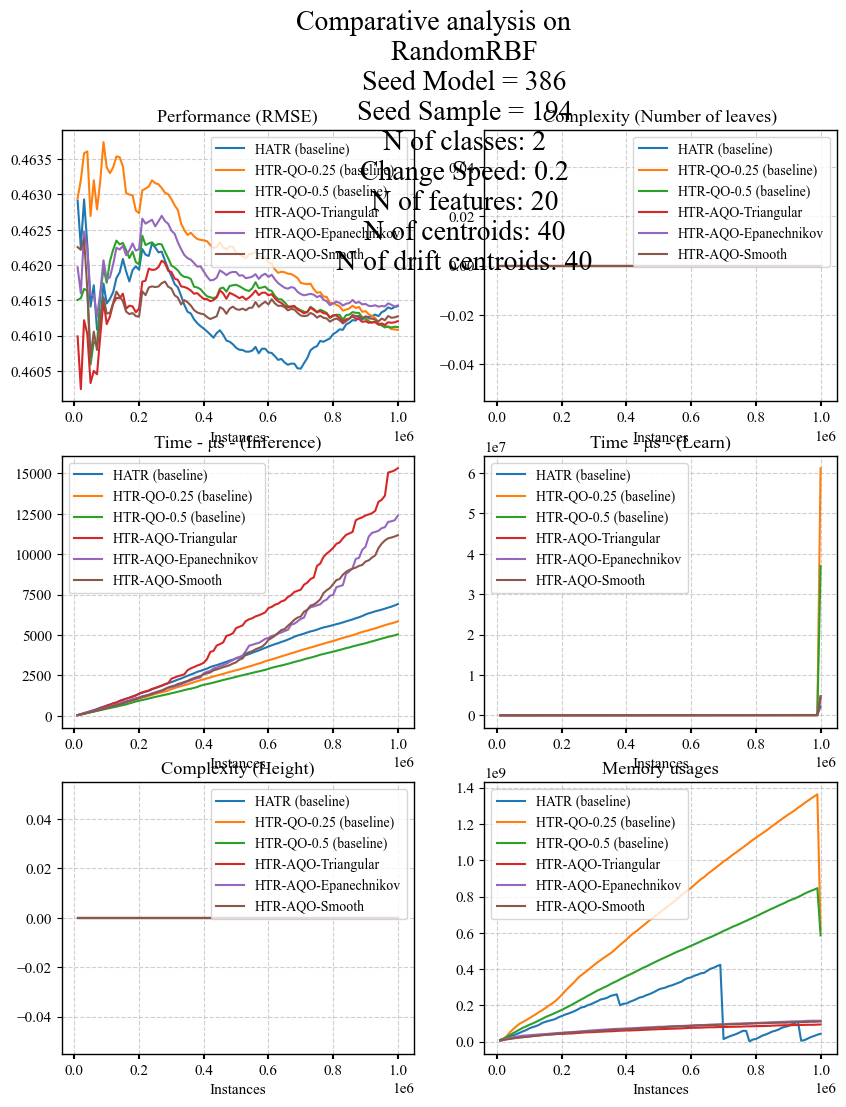

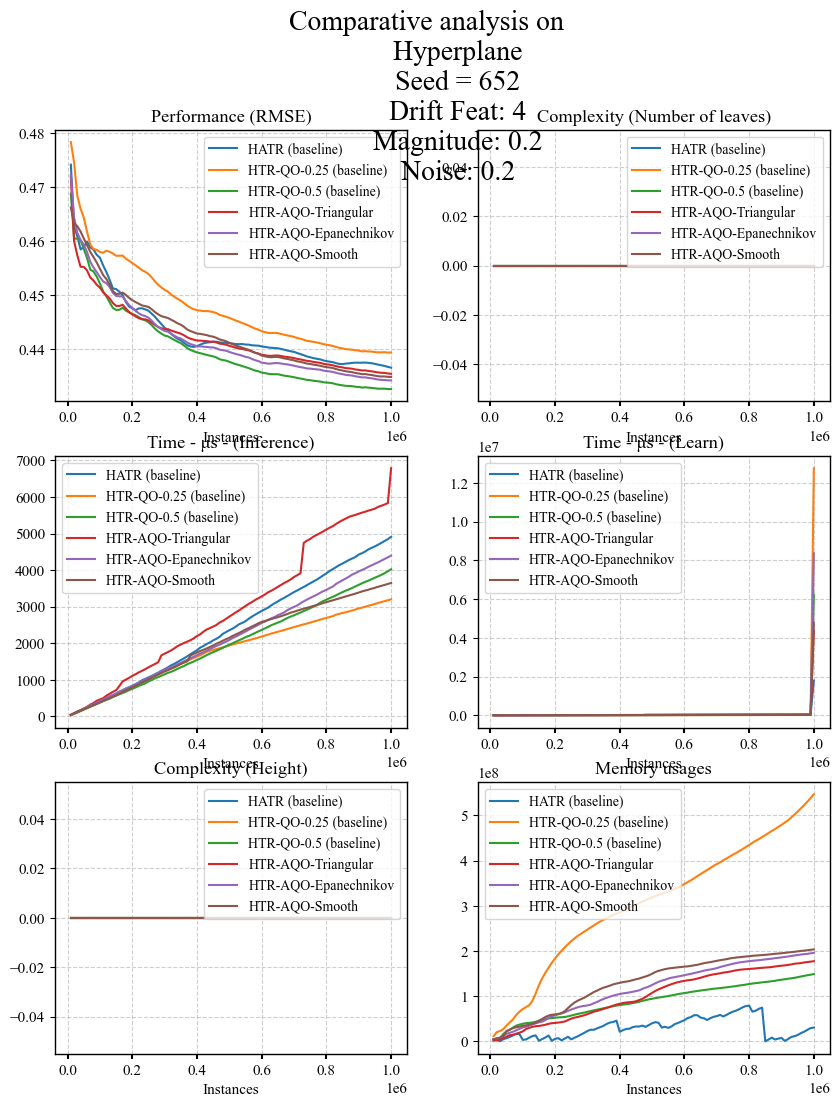

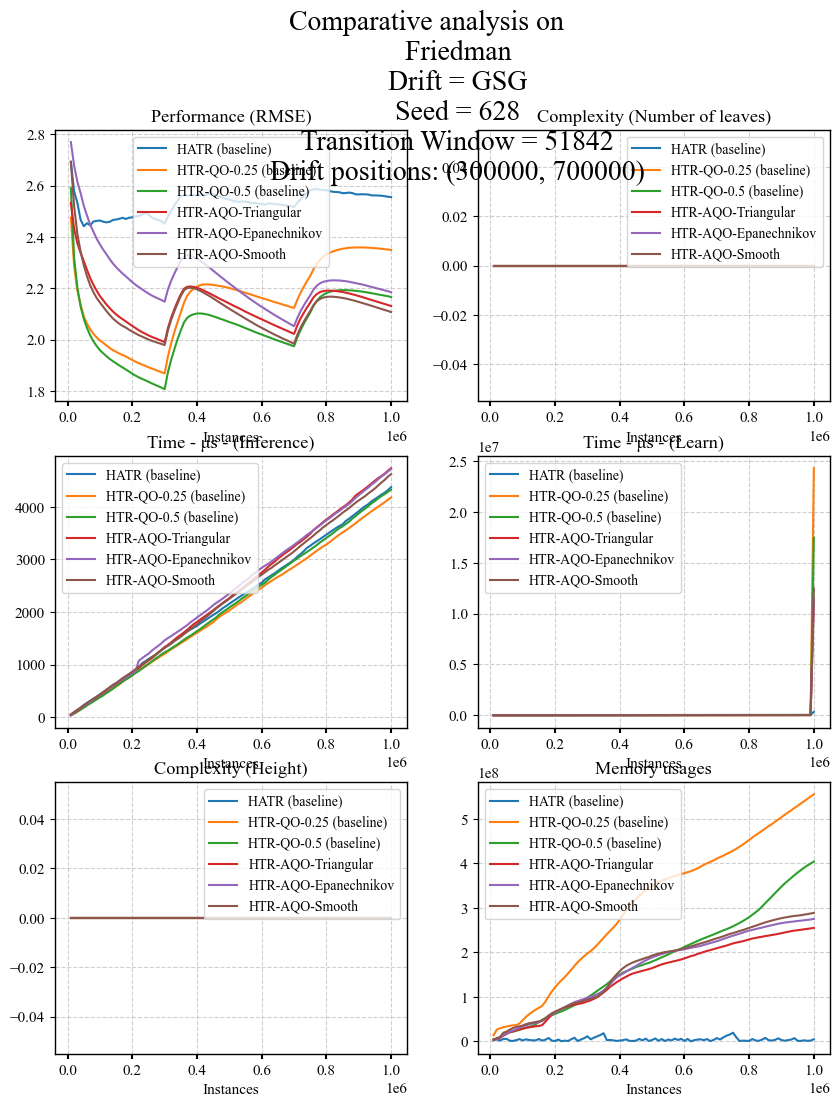

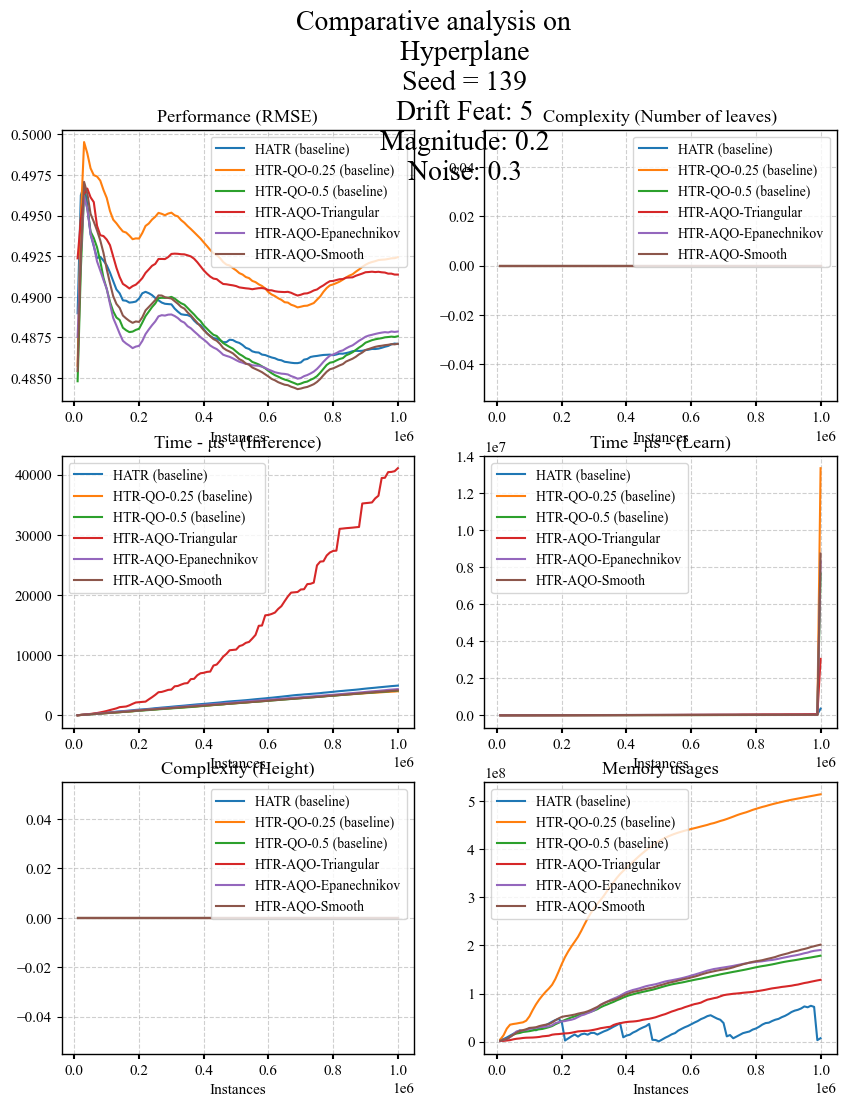

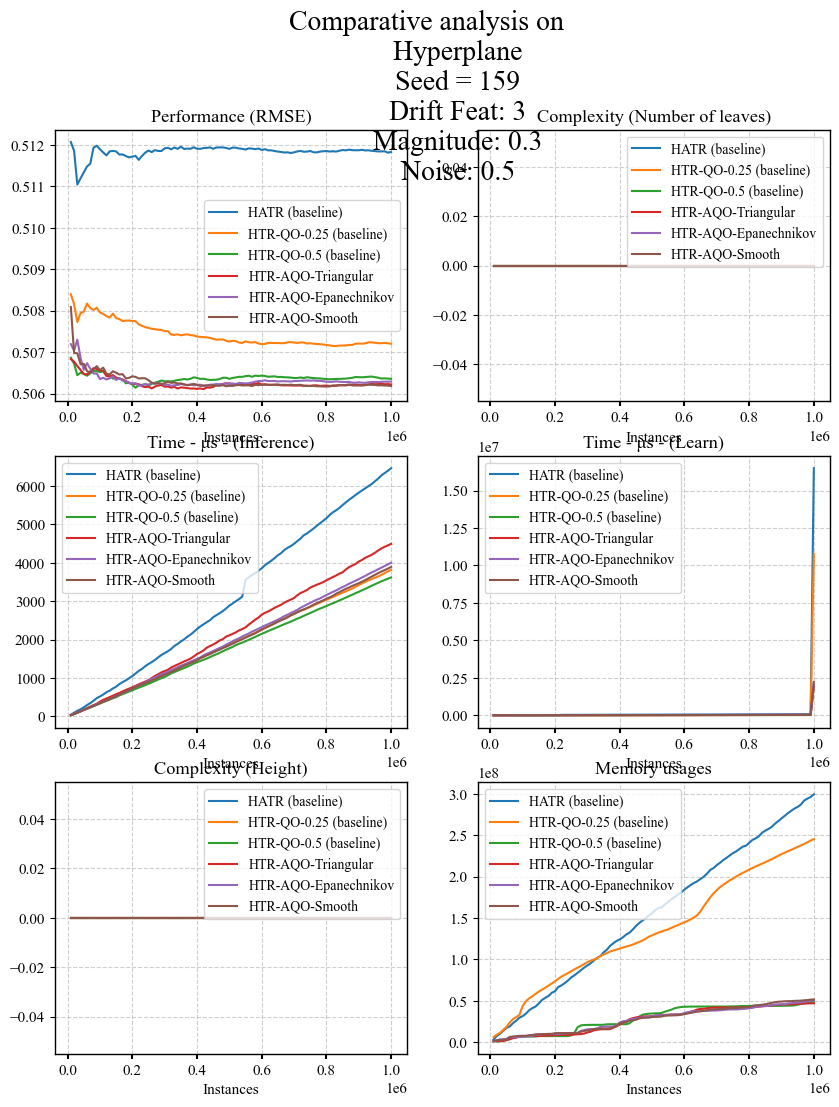

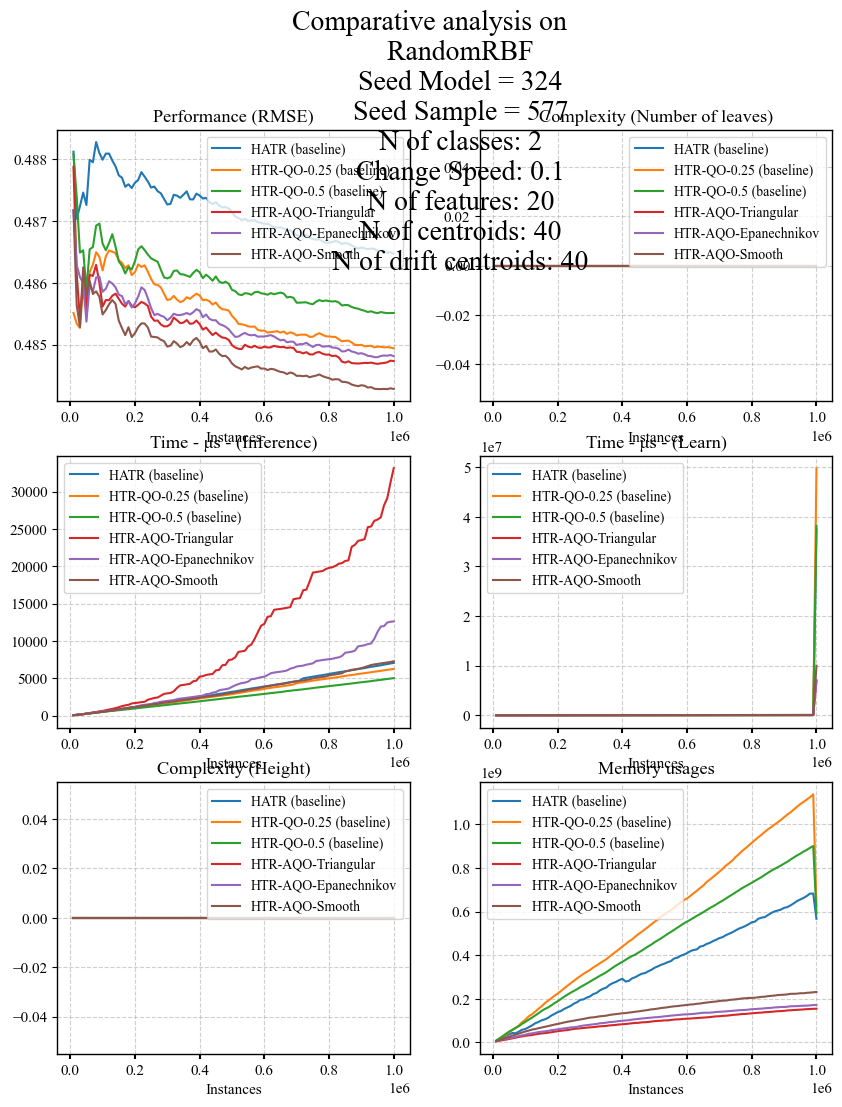

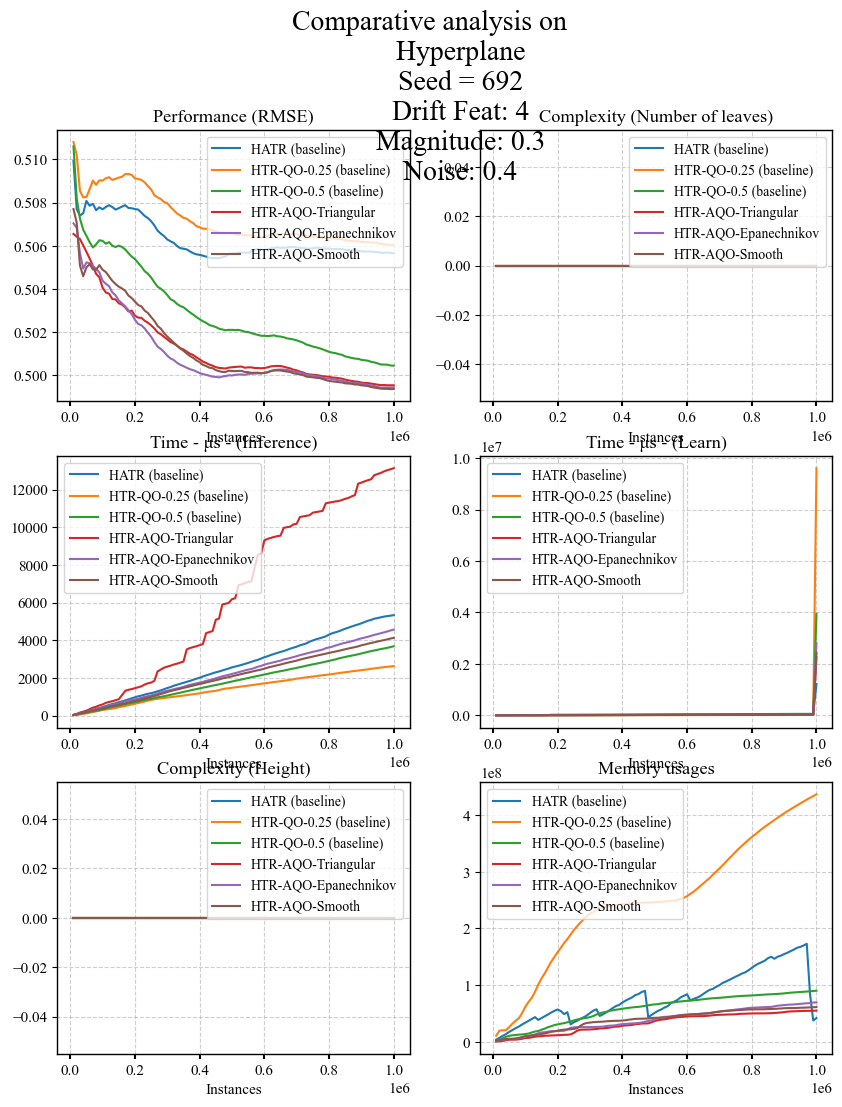

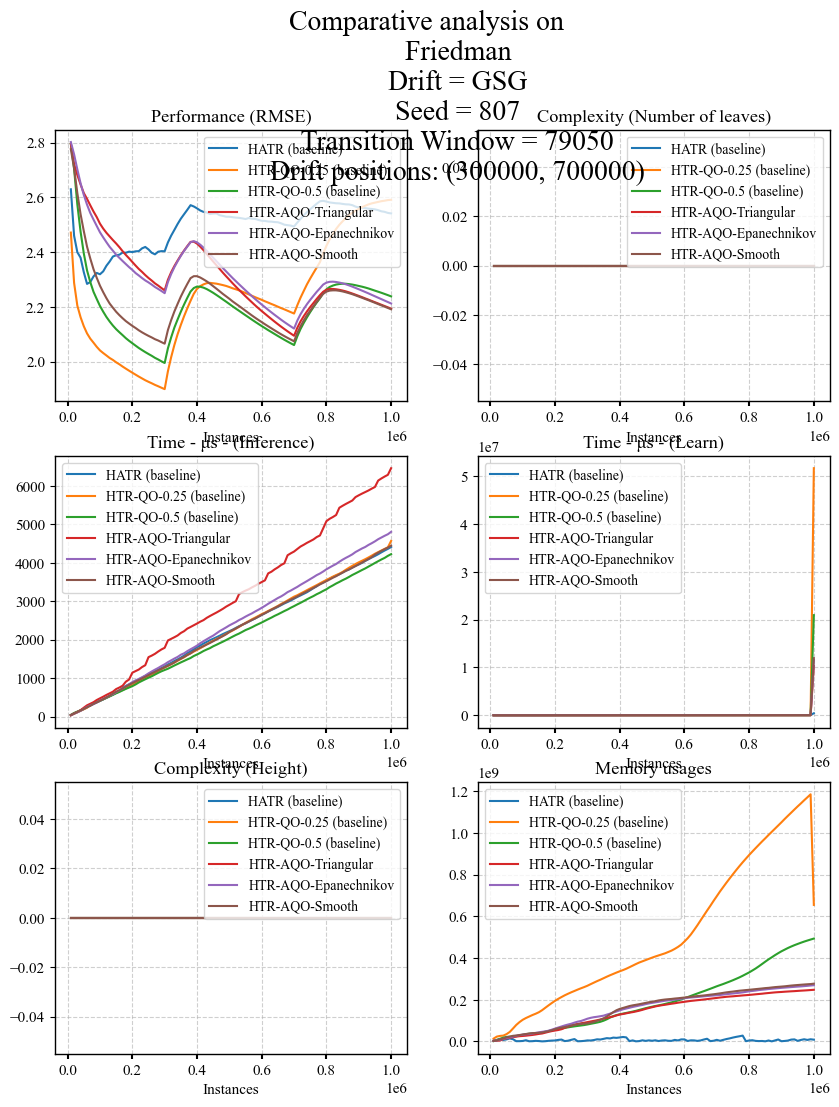

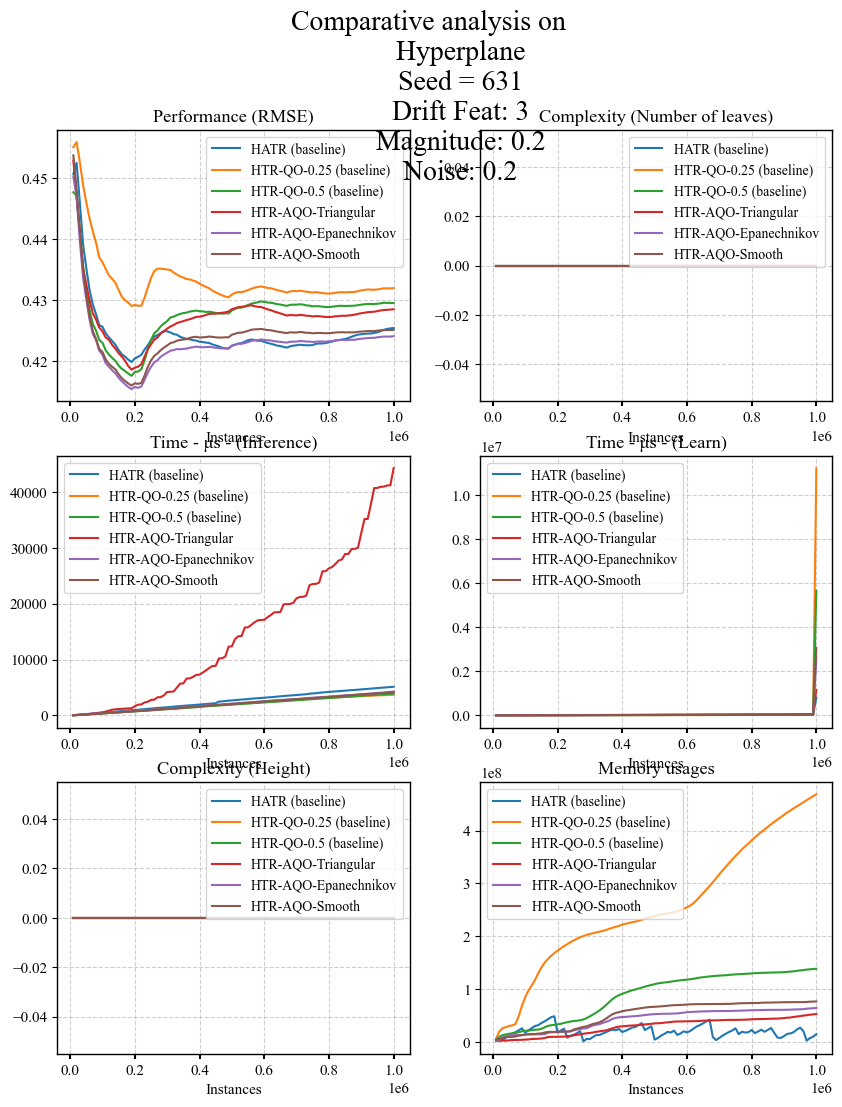

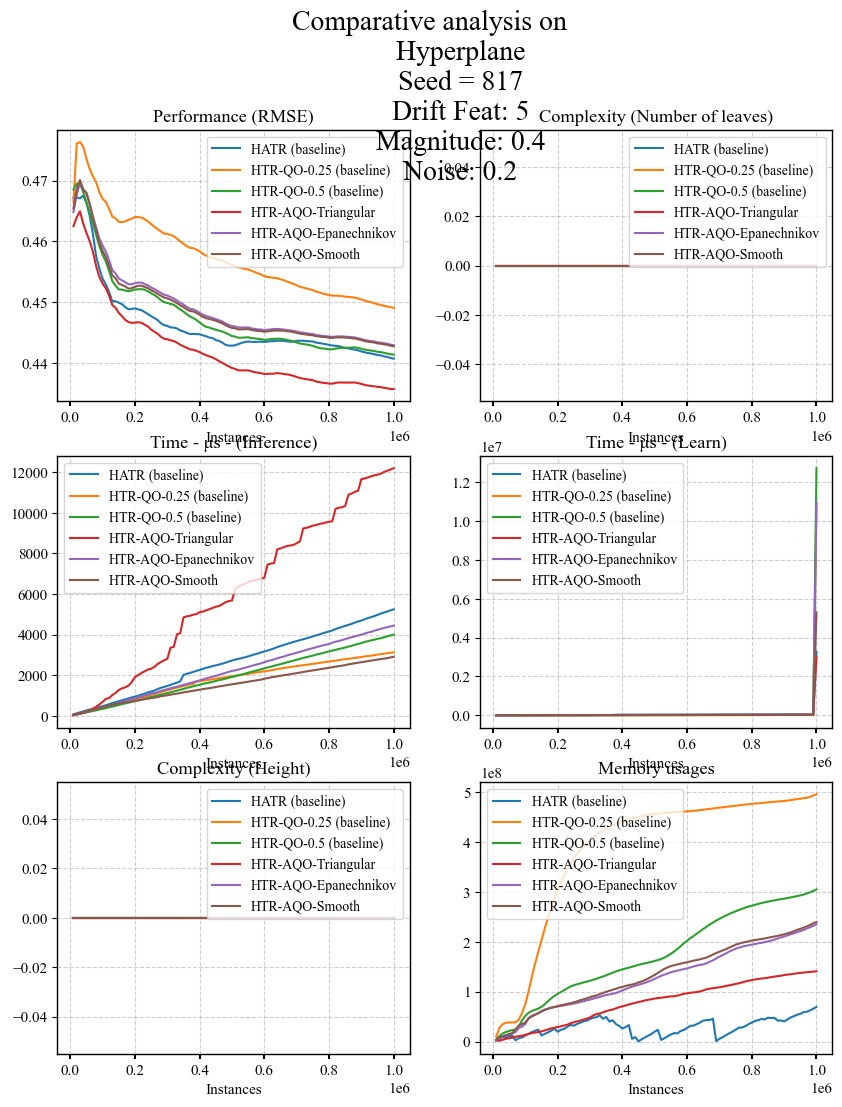

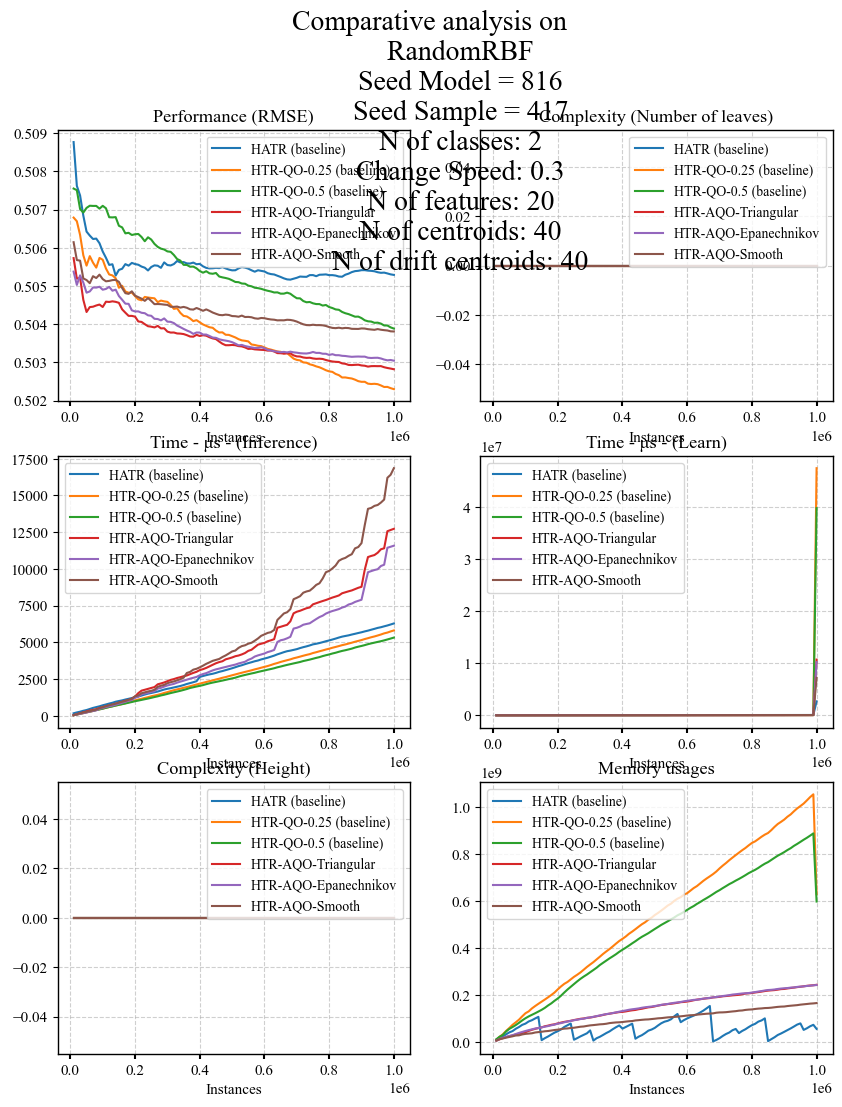

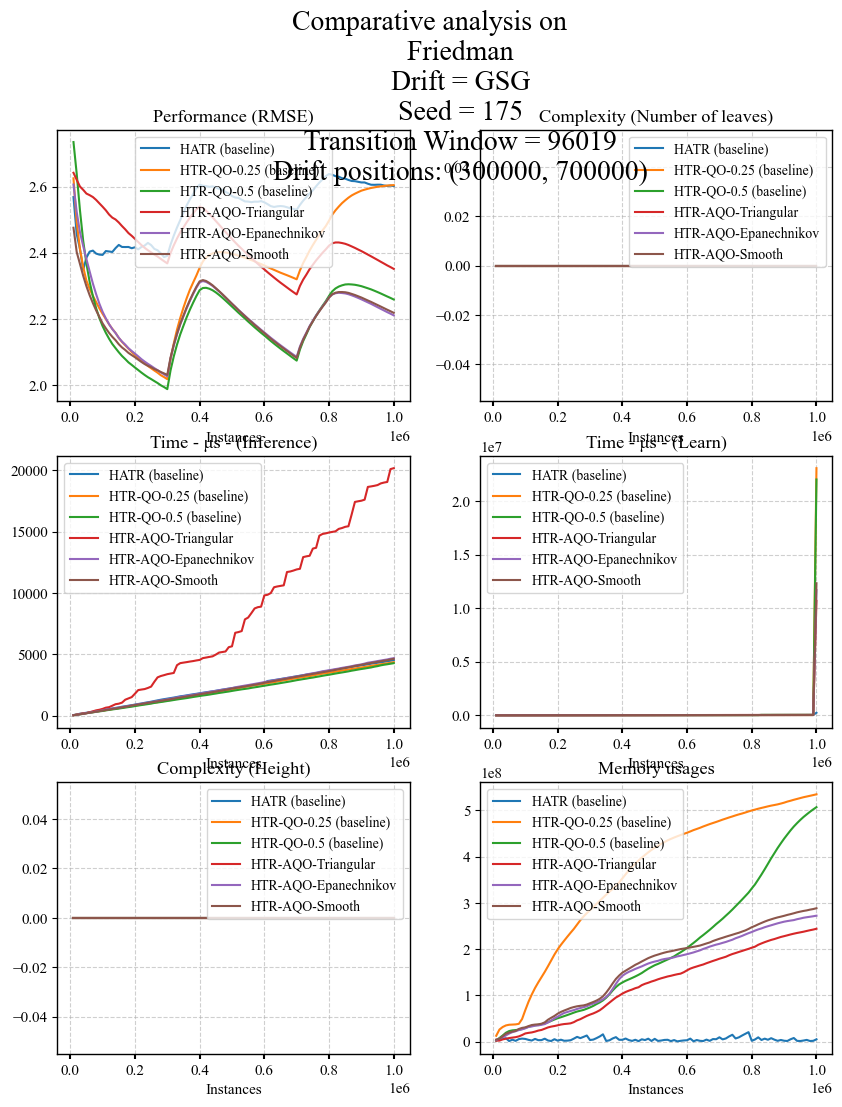

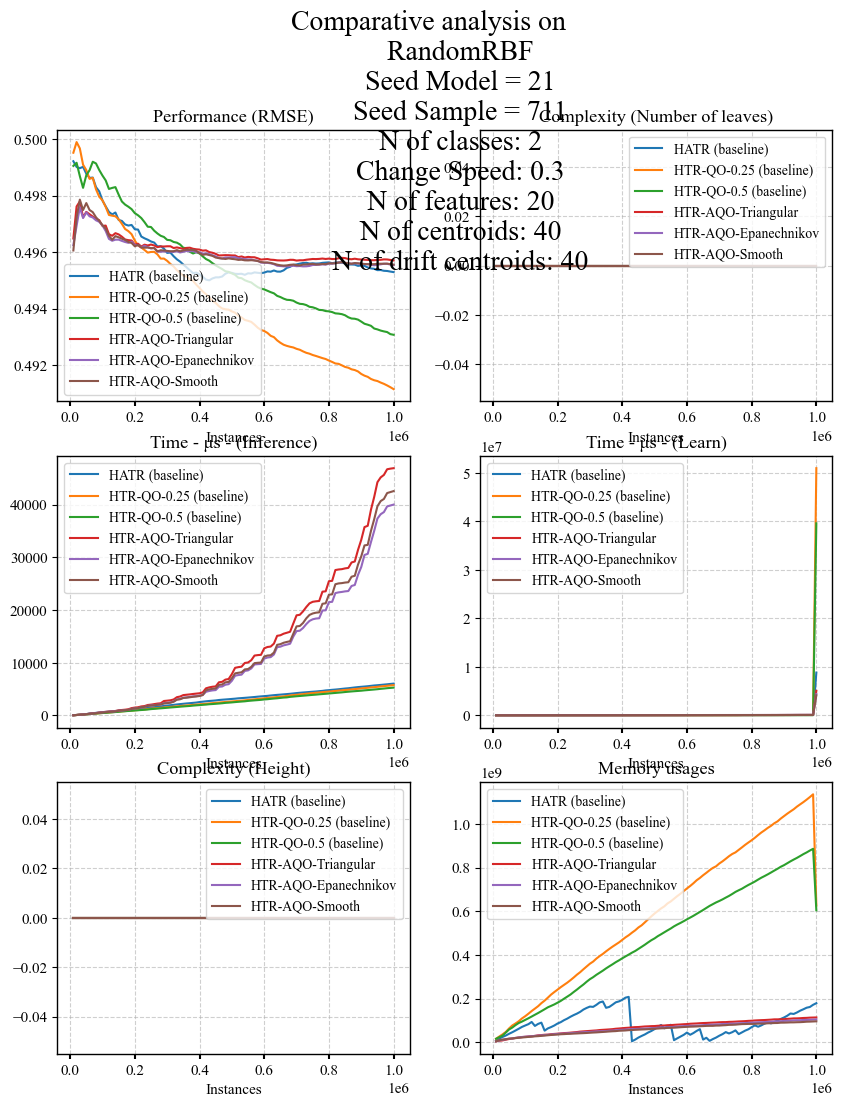

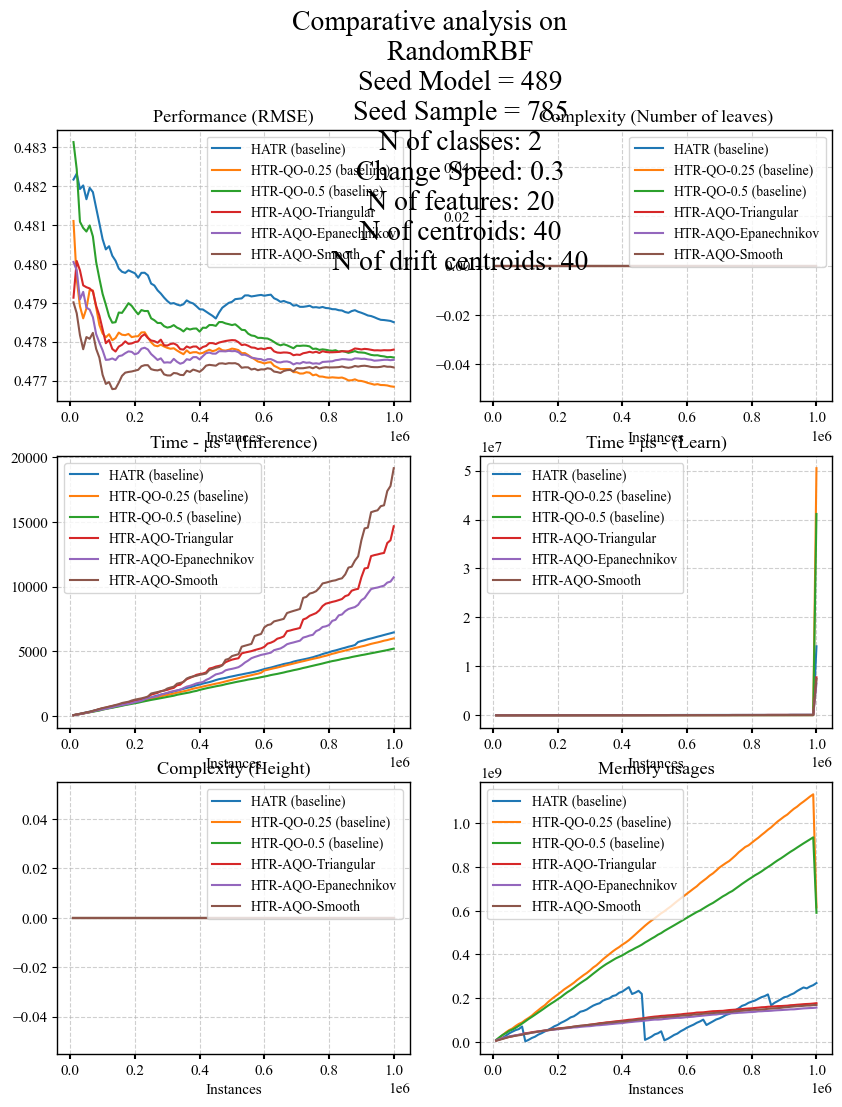

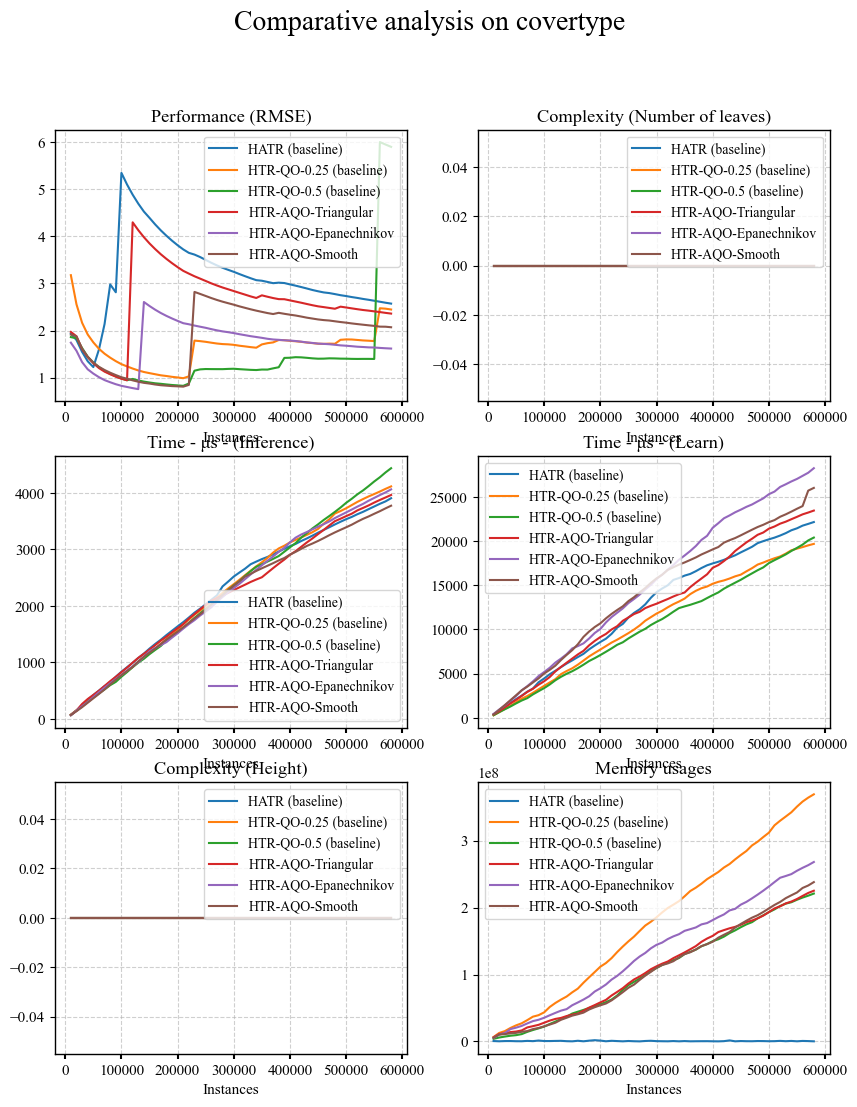

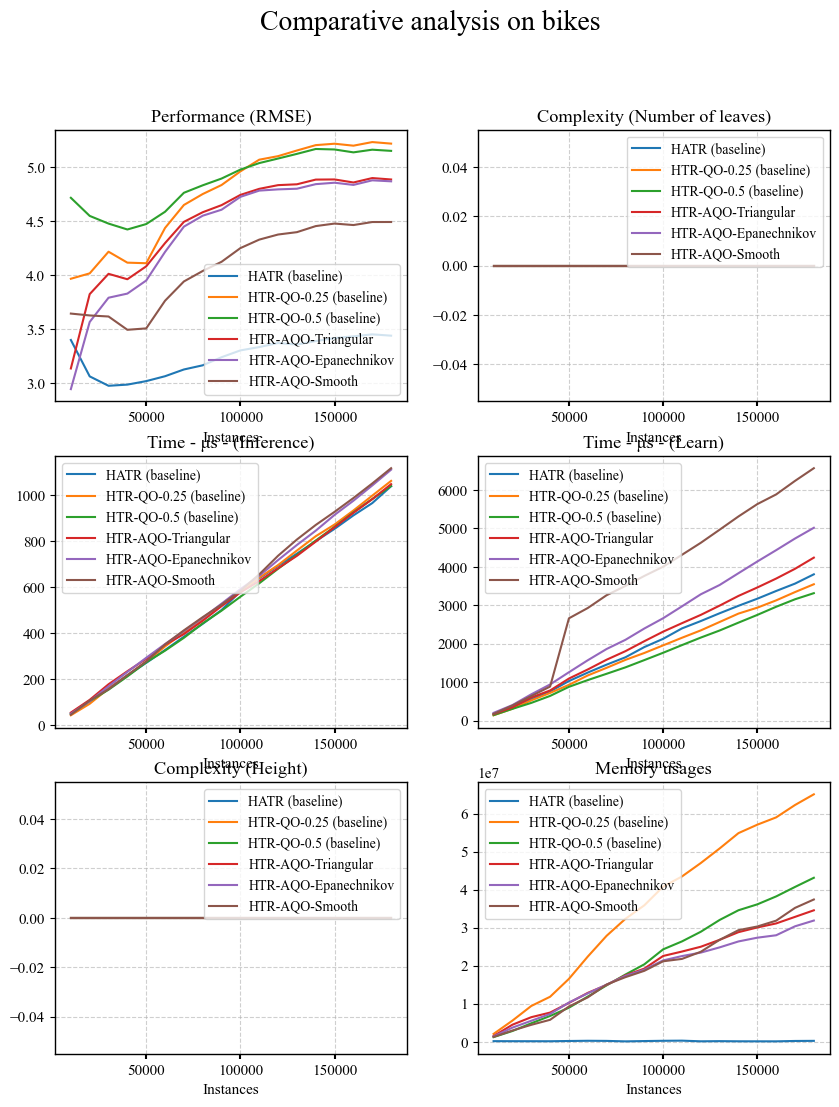

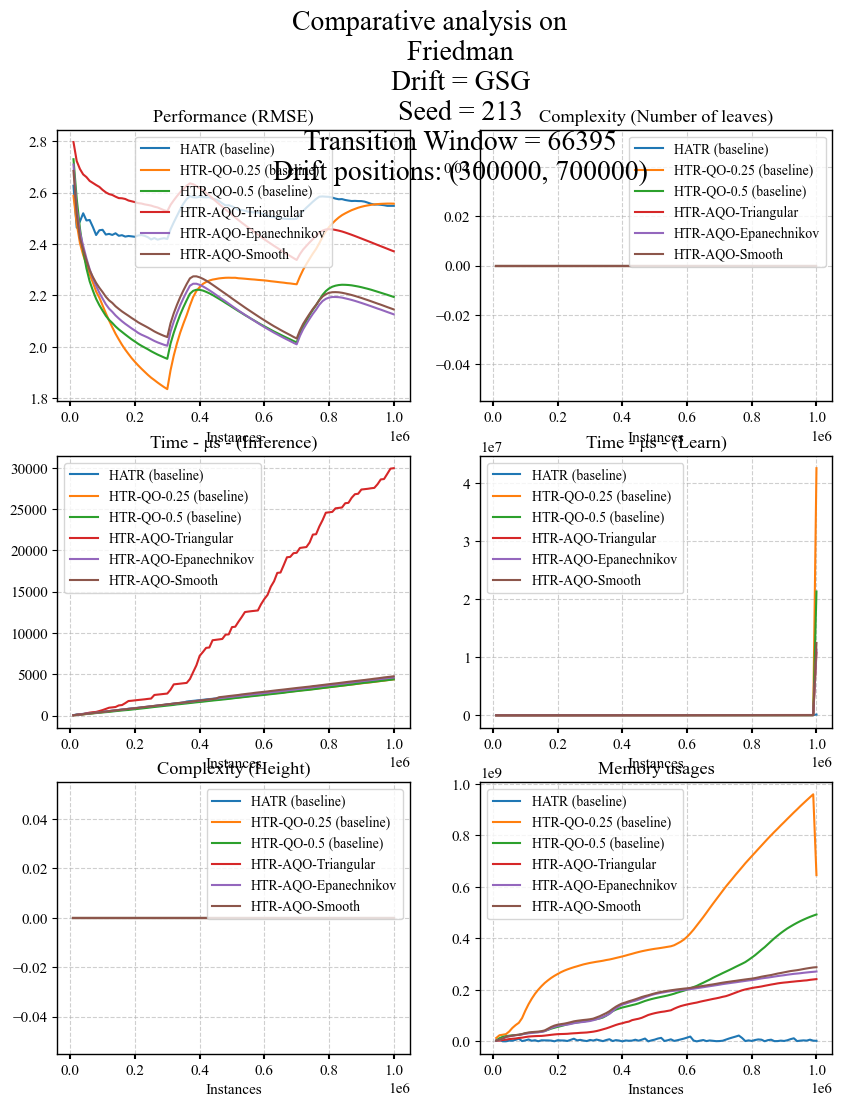

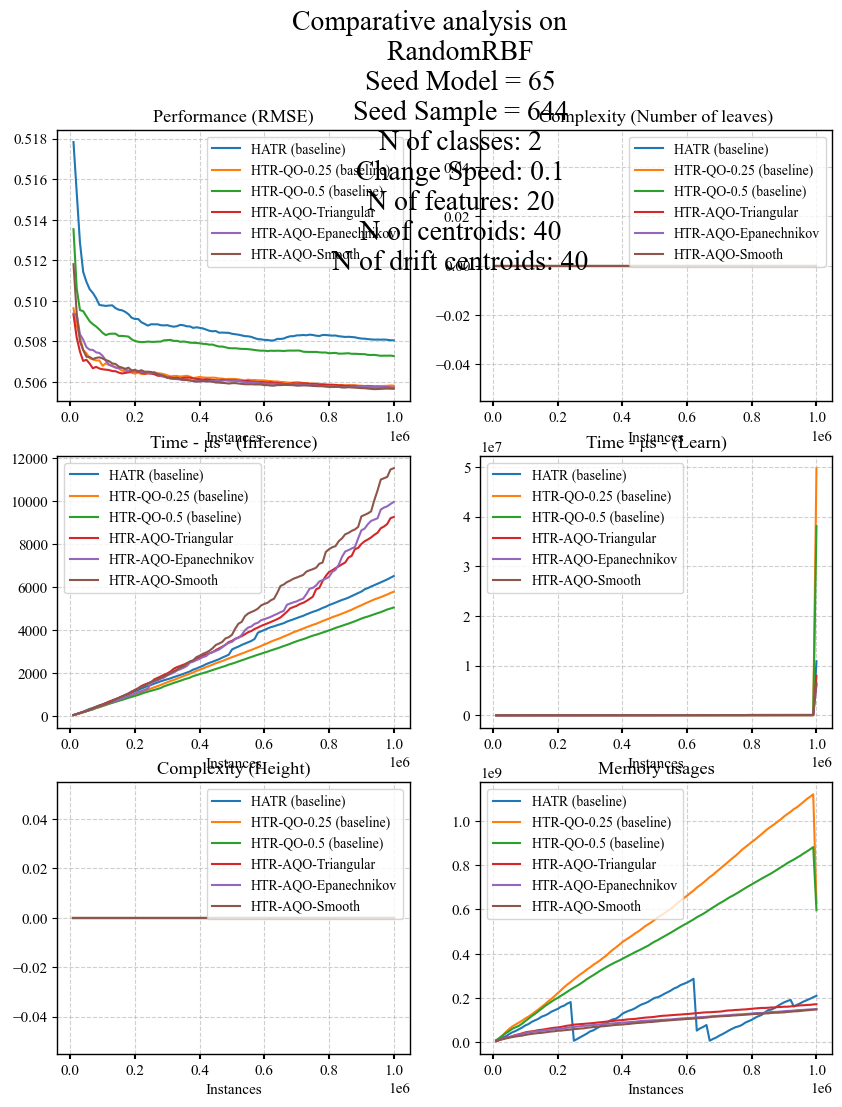

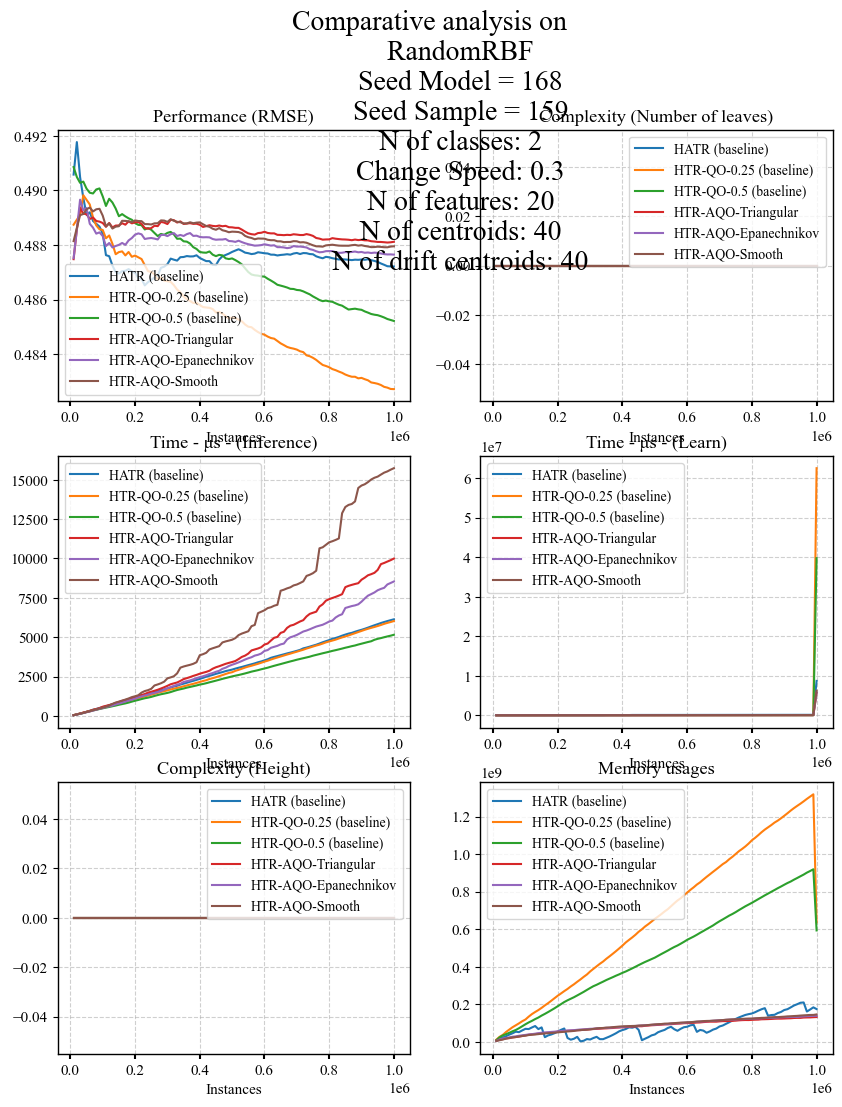

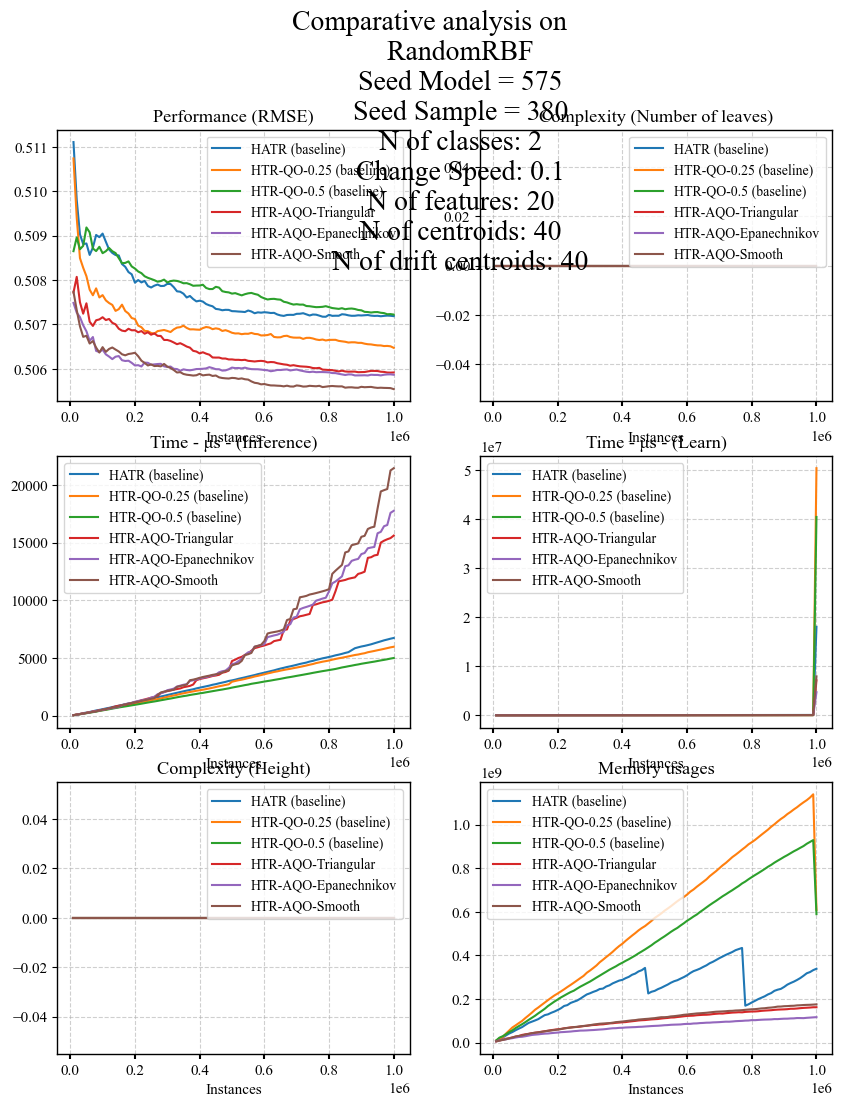

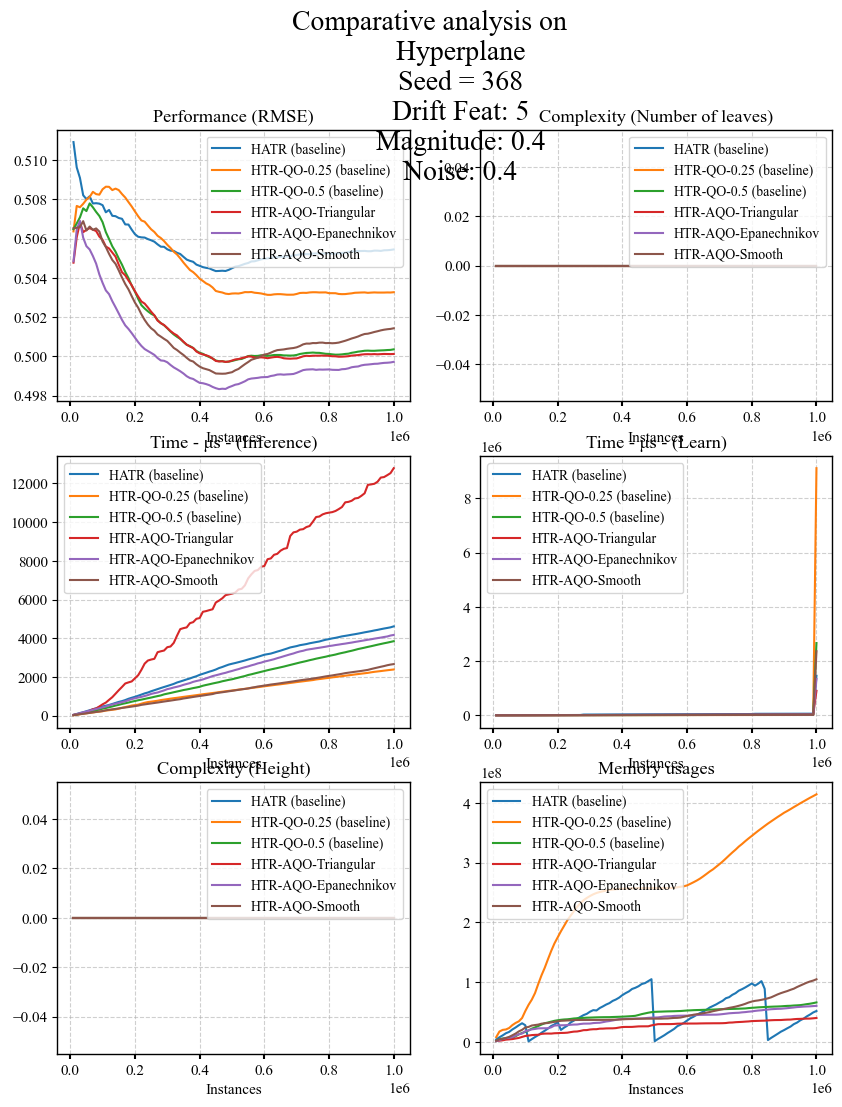

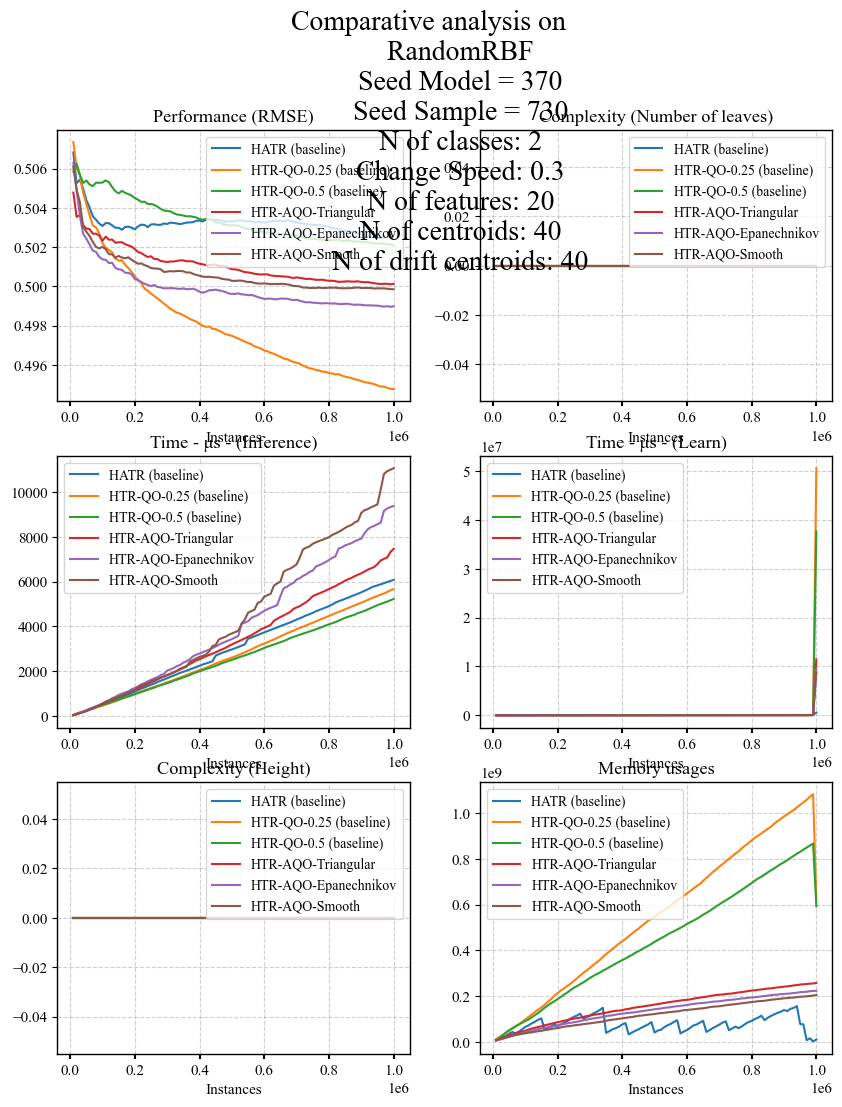

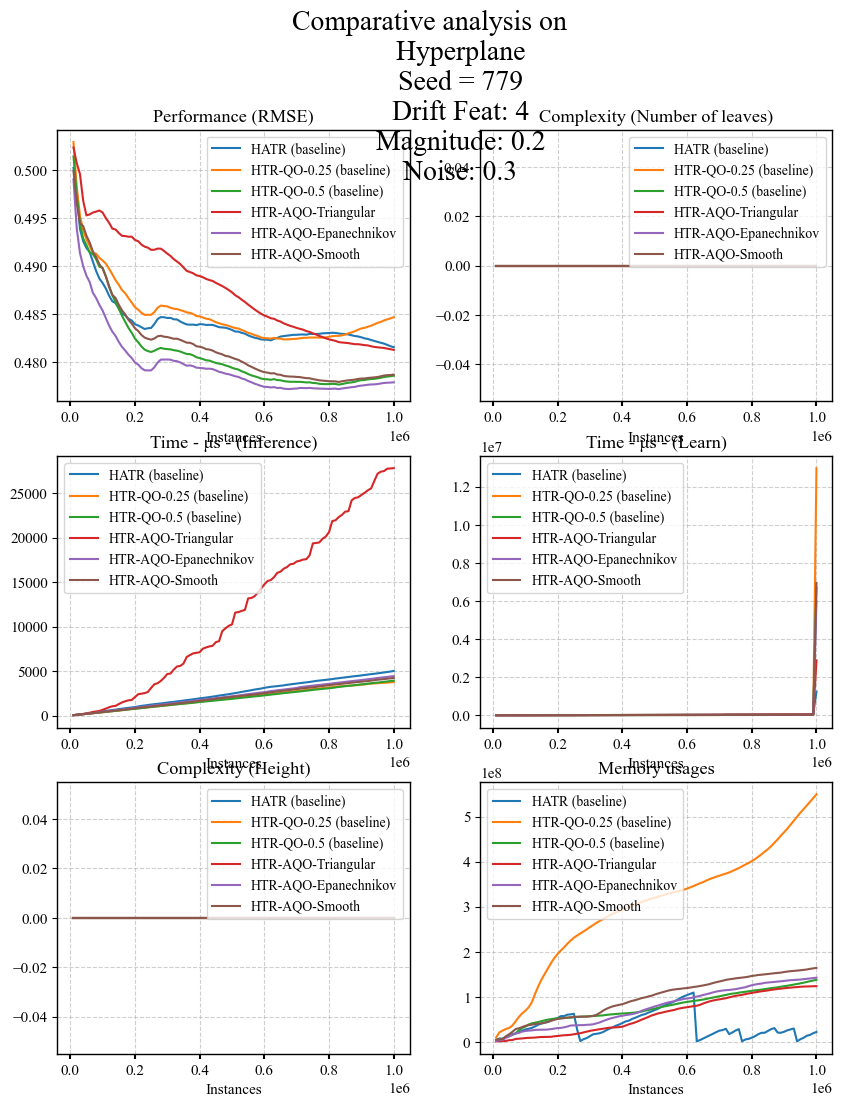

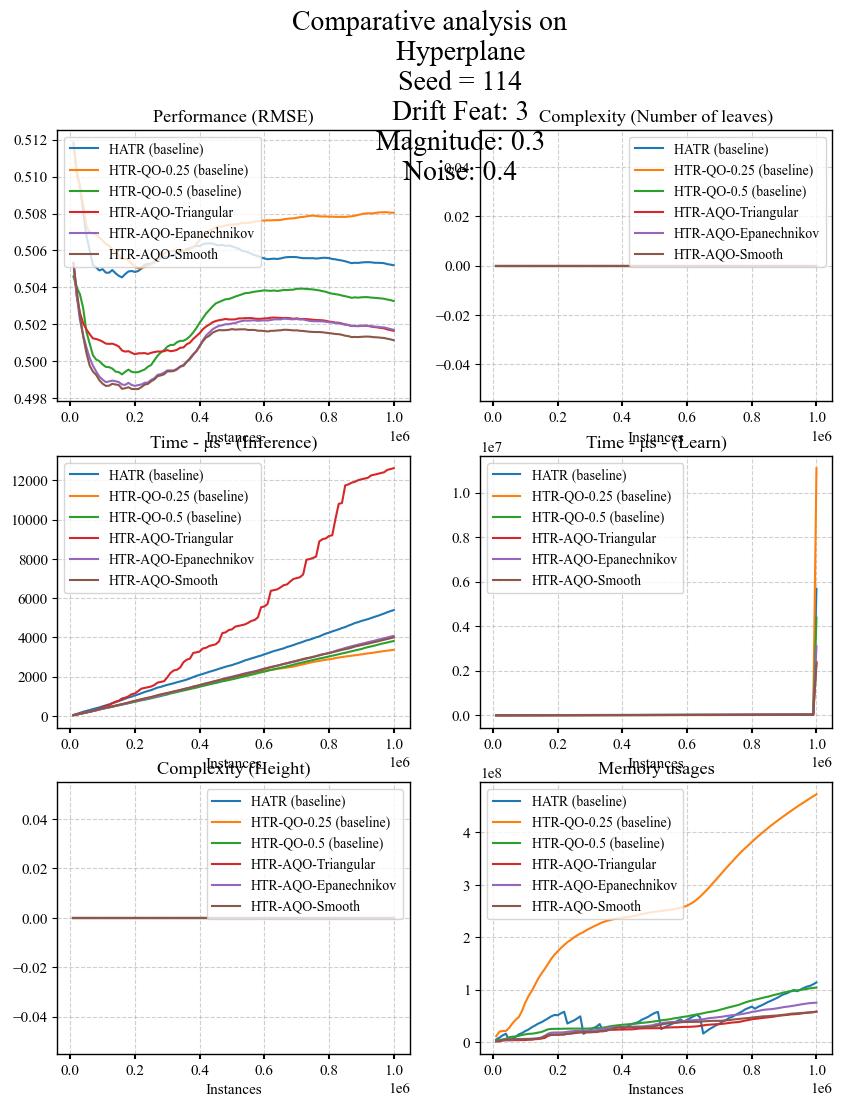

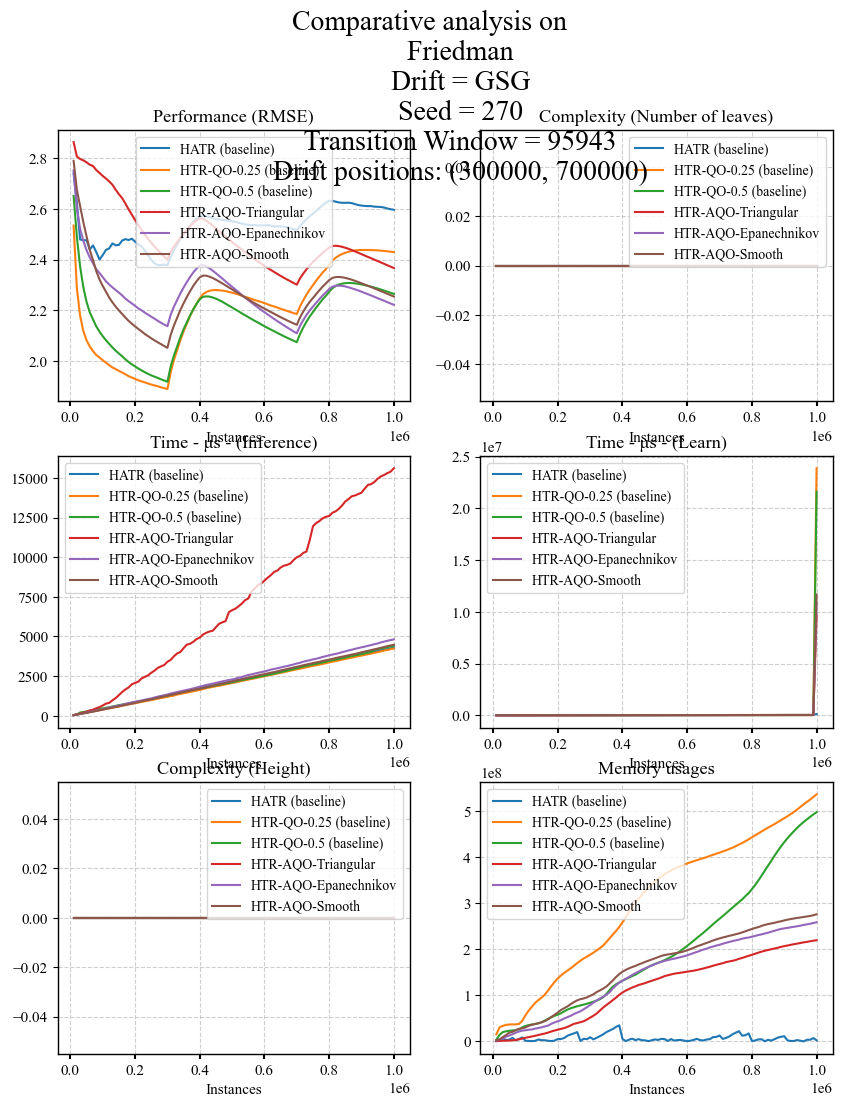

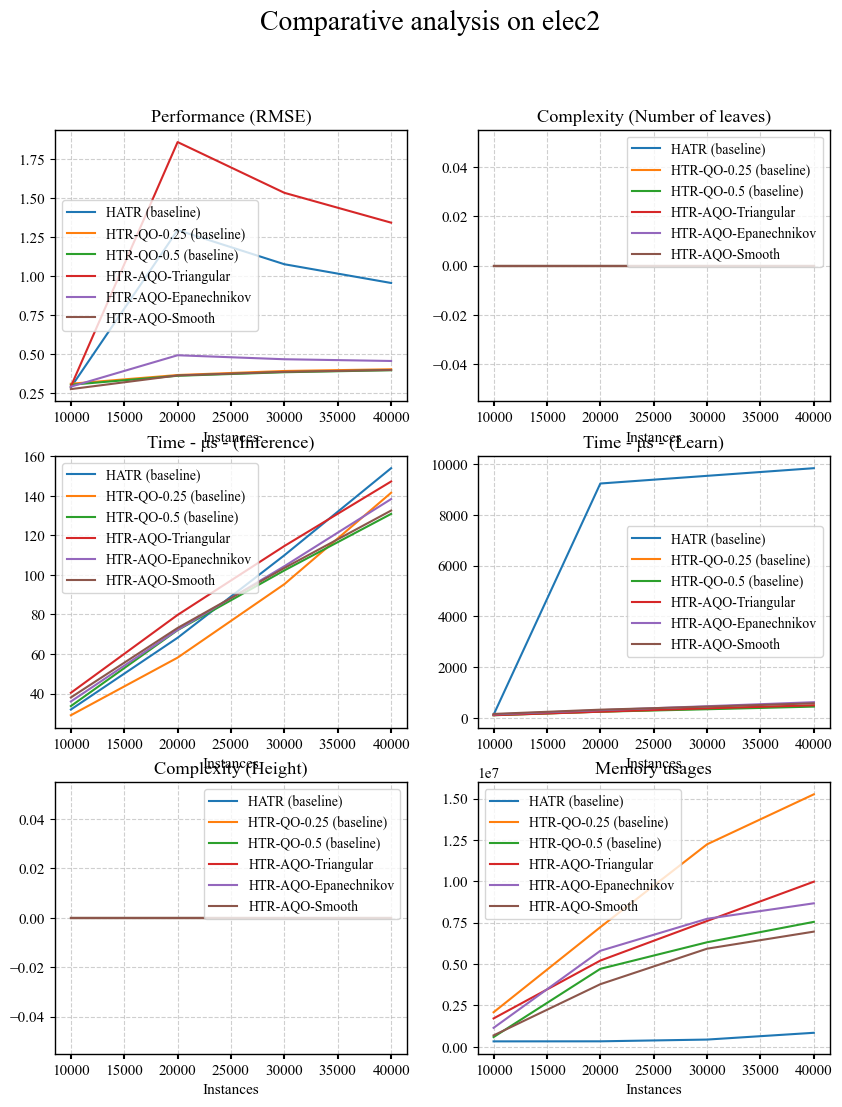

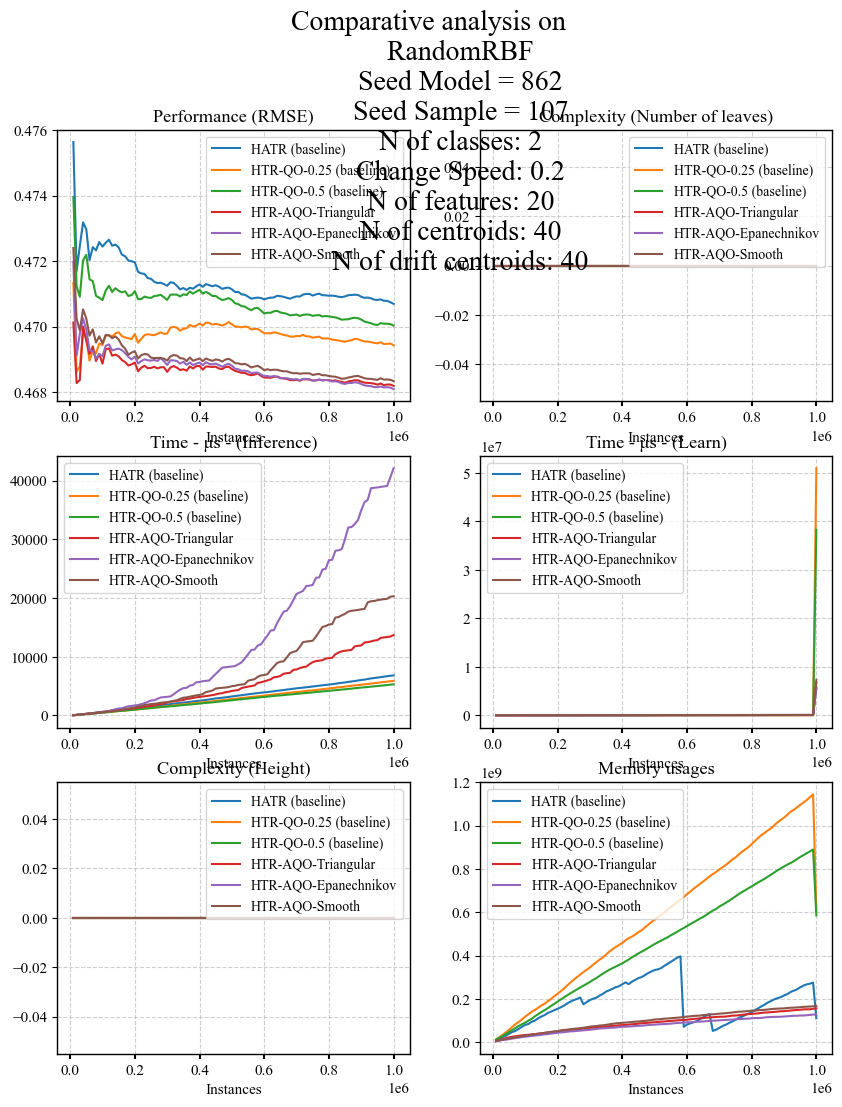

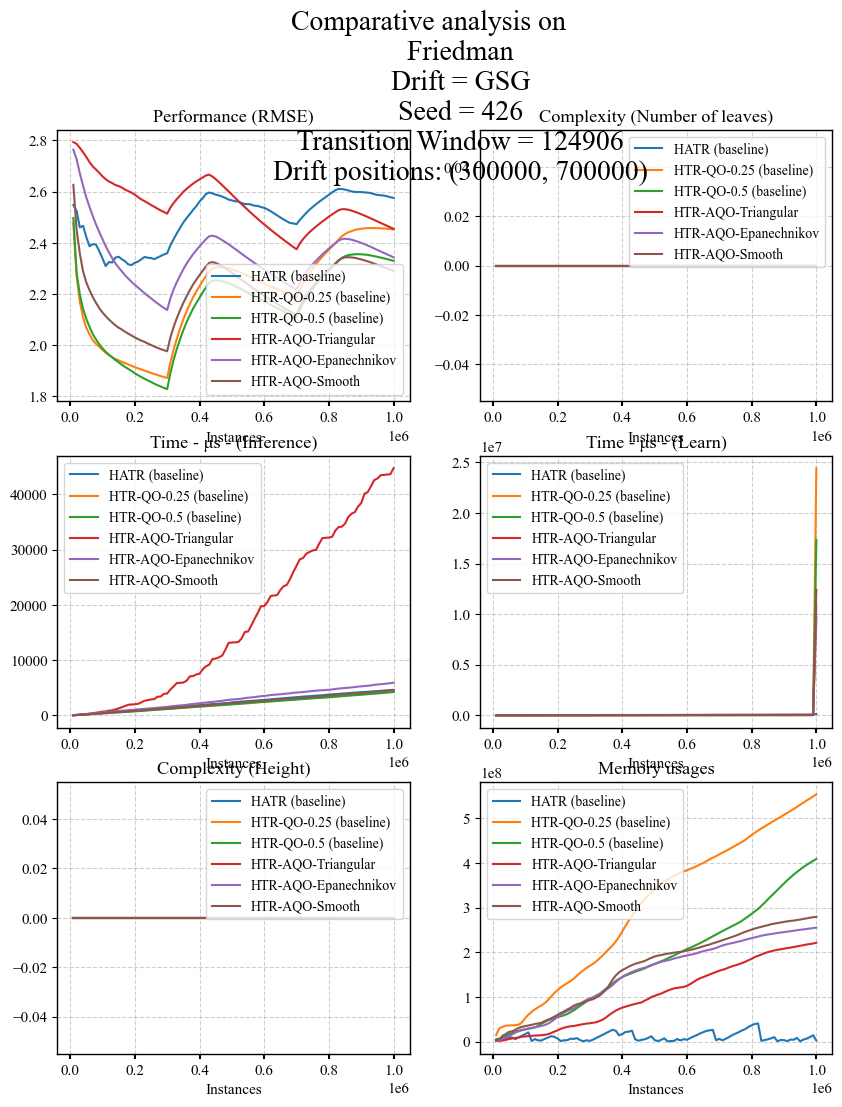

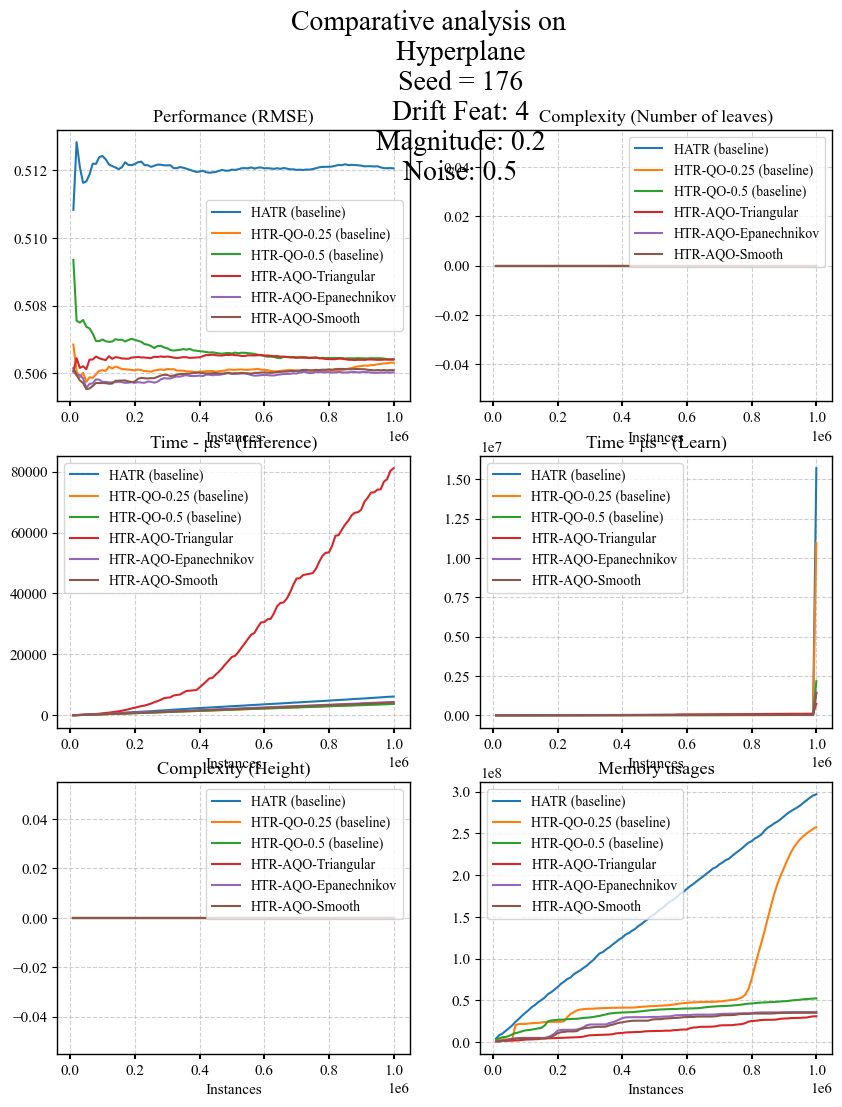

Gráfico salvo: ./output/plots/analysis_0.png
Gráfico salvo: ./output/plots/analysis_1.png
Gráfico salvo: ./output/plots/analysis_2.png
Gráfico salvo: ./output/plots/analysis_3.png
Gráfico salvo: ./output/plots/analysis_4.png
Gráfico salvo: ./output/plots/analysis_5.png
Gráfico salvo: ./output/plots/analysis_6.png
Gráfico salvo: ./output/plots/analysis_7.png
Gráfico salvo: ./output/plots/analysis_8.png
Gráfico salvo: ./output/plots/analysis_9.png
Gráfico salvo: ./output/plots/analysis_10.png
Gráfico salvo: ./output/plots/analysis_11.png
Gráfico salvo: ./output/plots/analysis_12.png
Gráfico salvo: ./output/plots/analysis_13.png
Gráfico salvo: ./output/plots/analysis_14.png
Gráfico salvo: ./output/plots/analysis_15.png
Gráfico salvo: ./output/plots/analysis_16.png
Gráfico salvo: ./output/plots/analysis_17.png
Gráfico salvo: ./output/plots/analysis_18.png
Gráfico salvo: ./output/plots/analysis_19.png
Gráfico salvo: ./output/plots/analysis_20.png
Gráfico salvo: ./output/plots/analysis_21.pn

In [9]:
plotter = Plots()
plotter.plot_all(logs)
plotter.export(logs)